In [47]:
#importing neccessary libraries for data preprocessing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot

In [48]:
#Reading Data files
data=pd.read_csv('C:/Users/MithunjhaAnandakumar/Downloads/data-storm-10/credit_card_default_train.csv')
data_2=pd.read_csv('C:/Users/MithunjhaAnandakumar/Downloads/data-storm-10/credit_card_default_test.csv')
#data.isna().sum()
#There are no NaN values

In [49]:
#train data
ID=data.pop('Client_ID')  # not a feature
balance=data.pop('Balance_Limit_V1') #for processing
#test data
ID_2=data_2.pop('Client_ID')
balance_2=data_2.pop('Balance_Limit_V1')

In [50]:
#convert M(millions), and K(thousands) to integers
#train data
for i in range (len(balance)):
    if balance[i][-1]=='M':
        balance[i]=float(balance[i][:-1])*1000000
    elif balance[i][-1]=='K':
        balance[i]=float(balance[i][:-1])*1000
    else:
         balance[i]=float(balance[i])*1
#test data    
for i in range (len(balance_2)):
    if balance_2[i][-1]=='M':
        balance_2[i]=float(balance_2[i][:-1])*1000000
    elif balance_2[i][-1]=='K':
        balance_2[i]=float(balance_2[i][:-1])*1000
    else:
         balance_2[i]=float(balance_2[i])*1

#print(balance.head())
balance=pd.to_numeric(balance)
balance_2=pd.to_numeric(balance_2)
#balance.dtype
data=pd.concat([data,balance],axis=1)
data_2=pd.concat([data_2,balance_2],axis=1)
        
                    

### removing some features with low correlation & creating new features with high correlation

In [51]:
#some data with low correlation removed
#train data
data.pop("EDUCATION_STATUS")
data.pop("MARITAL_STATUS")
data.pop("AGE")
data.pop("Gender")
due_july=data.pop('DUE_AMT_JULY')
due_aug=data.pop('DUE_AMT_AUG')
due_sep=data.pop('DUE_AMT_SEP')
due_oct=data.pop('DUE_AMT_OCT')
due_nov=data.pop('DUE_AMT_NOV')    
due_dec=data.pop('DUE_AMT_DEC')
paid_july=data.pop('PAID_AMT_JULY')
paid_aug=data.pop('PAID_AMT_AUG')
paid_sep=data.pop('PAID_AMT_SEP')
paid_oct=data.pop('PAID_AMT_OCT')
paid_nov=data.pop('PAID_AMT_NOV')
paid_dec=data.pop('PAID_AMT_DEC')

#test data
data_2.pop("EDUCATION_STATUS")
data_2.pop("MARITAL_STATUS")
data_2.pop("AGE")
data_2.pop("Gender")
due_july2=data_2.pop('DUE_AMT_JULY')
due_aug2=data_2.pop('DUE_AMT_AUG')
due_sep2=data_2.pop('DUE_AMT_SEP')
due_oct2=data_2.pop('DUE_AMT_OCT')
due_nov2=data_2.pop('DUE_AMT_NOV')    
due_dec2=data_2.pop('DUE_AMT_DEC')
paid_july2=data_2.pop('PAID_AMT_JULY')
paid_aug2=data_2.pop('PAID_AMT_AUG')
paid_sep2=data_2.pop('PAID_AMT_SEP')
paid_oct2=data_2.pop('PAID_AMT_OCT')
paid_nov2=data_2.pop('PAID_AMT_NOV')
paid_dec2=data_2.pop('PAID_AMT_DEC')

In [52]:
#payment history pay tot
#Creating new feature pay_mean
#payment history pay_mean
#mean of payments made in months whther its early payment or due

data_copy=data.copy()
pay_july=data_copy.pop('PAY_JULY')   # these features are good
pay_aug=data_copy.pop('PAY_AUG')
pay_sep=data_copy.pop('PAY_SEP')
pay_oct=data_copy.pop('PAY_OCT')
pay_nov=data_copy.pop('PAY_NOV')
pay_dec=data_copy.pop('PAY_DEC')

pay_tot=(pay_july+pay_aug+pay_sep+pay_oct+pay_nov+pay_dec)
pd.to_numeric(pay_tot)
data=pd.concat([data,pay_tot.rename("pay_tot")],axis=1)

#good pay data
#creating new feature - good_pay
#New feature to find whether the customar is a good pay,, pays on time
#good pay data
good_pay=pay_july.copy()

for i in range (len(pay_aug)):
    good_pay[i]=0
    if pay_july[i]<1:
        good_pay[i]+=1
    if pay_aug[i]<1:
        good_pay[i]+=1
    if pay_sep[i]<1:
        good_pay[i]+=1
    if pay_oct[i]<1:
        good_pay[i]+=1
    if pay_nov[i]<1:
        good_pay[i]+=1
    if pay_dec[i]<1:
        good_pay[i]+=1
        
data=pd.concat([data,good_pay.rename("good_pay")],axis=1)

#repeat above process for test data
data2_copy=data_2.copy()
pay_july2=data2_copy.pop('PAY_JULY')   # these features are good
pay_aug2=data2_copy.pop('PAY_AUG')
pay_sep2=data2_copy.pop('PAY_SEP')
pay_oct2=data2_copy.pop('PAY_OCT')
pay_nov2=data2_copy.pop('PAY_NOV')
pay_dec2=data2_copy.pop('PAY_DEC')

pay_tot2=(pay_july2+pay_aug2+pay_sep2+pay_oct2+pay_nov2+pay_dec2)
pd.to_numeric(pay_tot)
data_2=pd.concat([data_2,pay_tot2.rename("pay_tot")],axis=1)

#good pay data
good_pay2=pay_july2.copy()

for i in range (len(pay_aug2)):
    good_pay2[i]=0
    if pay_july2[i]<1:
        good_pay2[i]+=1
    if pay_aug2[i]<1:
        good_pay2[i]+=1
    if pay_sep2[i]<1:
        good_pay2[i]+=1
    if pay_oct2[i]<1:
        good_pay2[i]+=1
    if pay_nov2[i]<1:
        good_pay2[i]+=1
    if pay_dec2[i]<1:
        good_pay2[i]+=1
        
data_2=pd.concat([data_2,good_pay2.rename("good_pay")],axis=1)

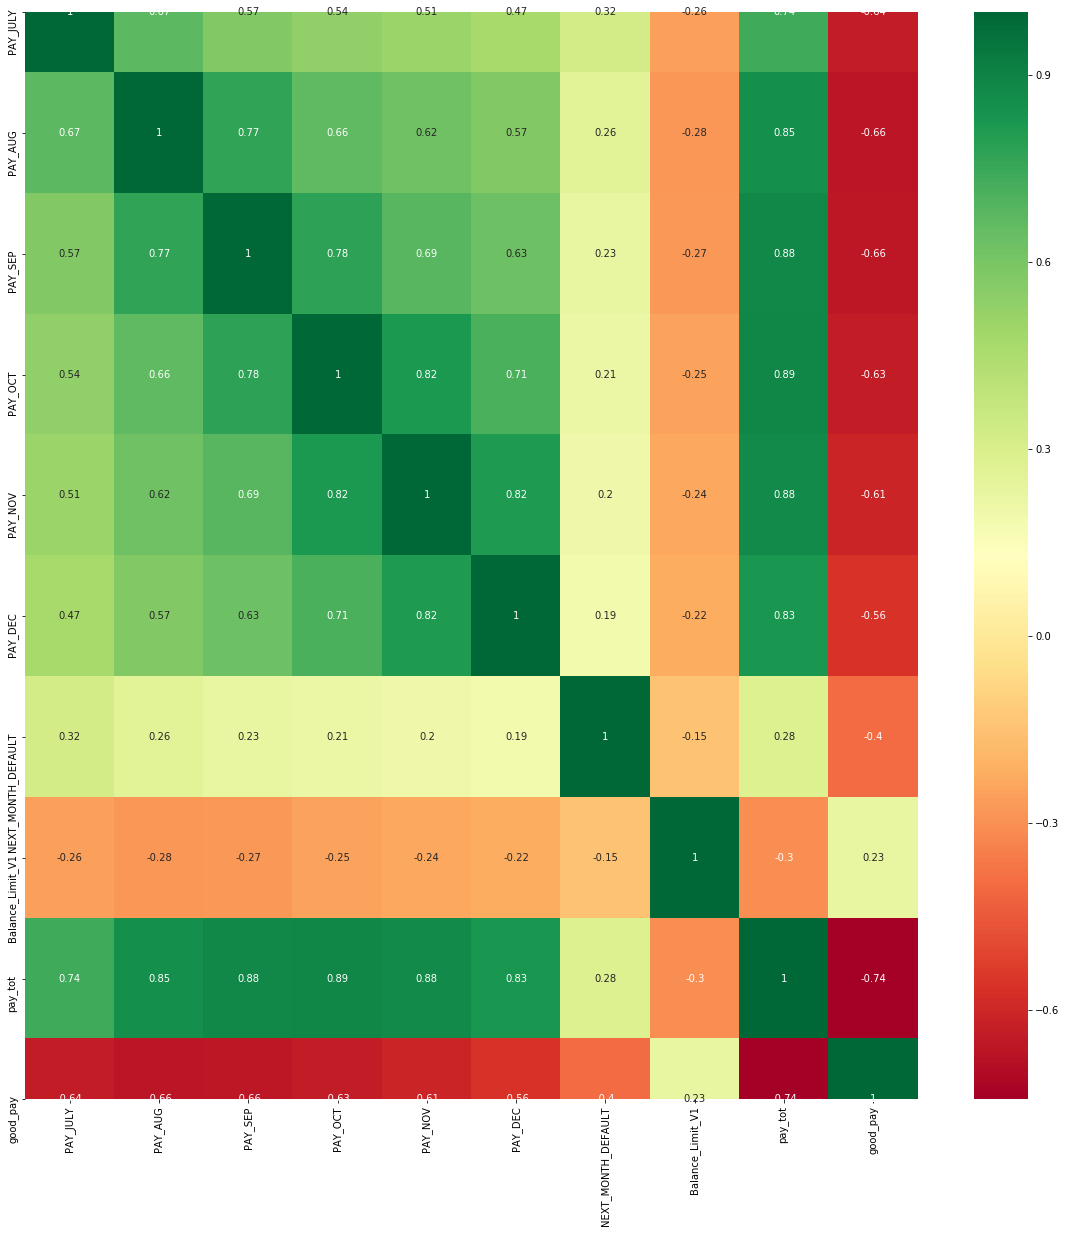

In [53]:
#heat map
#correlations between each features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [54]:
#y_train
Labels=data.pop('NEXT_MONTH_DEFAULT')

In [55]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data = sc.fit_transform(data)
data_2 = sc.transform(data_2)

In [56]:
data=pd.DataFrame(data)
data_2=pd.DataFrame(data_2)

In [57]:
#libraries required for machine learning model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import xgboost
from sklearn.metrics import precision_score,roc_auc_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

In [58]:
#split data
train_data, test_data, train_label, test_label = train_test_split(data,Labels,test_size = 0.2,random_state = 100)

In [59]:
#Decision tree approach
clf = DecisionTreeClassifier(max_depth=7).fit(train_data,train_label)
y_predict=clf.predict(test_data)
print("Train accuracy")
print(format(clf.score(train_data,train_label)))
print("Test accuracy")
print(format(clf.score(test_data,test_label)))
print("F1-Score")
print(f1_score(test_label,y_predict))
print("Classification Report")
print(classification_report(test_label,y_predict))
print("Confusion Matrix")
print(confusion_matrix(test_label,y_predict))

Train accuracy
0.8258854166666667
Test accuracy
0.8177083333333334
F1-Score
0.4667885435709933
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      3773
           1       0.62      0.37      0.47      1027

    accuracy                           0.82      4800
   macro avg       0.73      0.66      0.68      4800
weighted avg       0.80      0.82      0.80      4800

Confusion Matrix
[[3542  231]
 [ 644  383]]


In [60]:
#XGB approach
clf = DecisionTreeClassifier(max_depth=50)
model=xgboost.XGBClassifier(base_estimator=clf,max_depth=2,eta=0.2,n_estimators=18,objective='binary:logistic',gamma=8.154,learning_rate=0.64,reg_lambda=6.85).fit(train_data,train_label)
y_predict=model.predict(test_data)
print("Train accuracy")
print(format(model.score(train_data,train_label)))
print("Test accuracy")
print(format(model.score(test_data,test_label)))
print("F1-Score")
print(f1_score(test_label,y_predict))
print("Classification Report")
print(classification_report(test_label,y_predict))
print("Confusion Matrix")
print(confusion_matrix(test_label,y_predict))

Train accuracy
0.82015625
Test accuracy
0.8229166666666666
F1-Score
0.4674185463659148
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      3773
           1       0.66      0.36      0.47      1027

    accuracy                           0.82      4800
   macro avg       0.75      0.66      0.68      4800
weighted avg       0.80      0.82      0.80      4800

Confusion Matrix
[[3577  196]
 [ 654  373]]


### SMOTE-Oversampling (handle biased dataset)

In [61]:
train_data, test_data, train_label, test_label = train_test_split(data,Labels,test_size=0.2,shuffle=True,random_state=505)#505
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(train_data,train_label) 


clf = DecisionTreeClassifier(max_depth=50)
model=xgboost.XGBClassifier(base_estimator=clf,max_depth=3,eta=0.2,n_estimators=26,objective='binary:logistic',gamma=8.83,learning_rate=0.64,reg_lambda=6.85).fit(X_train_res, y_train_res)
y_predict=model.predict(test_data)
print("Train accuracy")
print(format(model.score(train_data,train_label)))
print("Test accuracy")
print(format(model.score(test_data,test_label)))
print("F1-Score")
print(f1_score(test_label,y_predict))
print("Classification Report")
print(classification_report(test_label,y_predict))
print("Confusion Matrix")
print(confusion_matrix(test_label,y_predict))


Train accuracy
0.7867708333333333
Test accuracy
0.8095833333333333
F1-Score
0.5834092980856882
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      3730
           1       0.57      0.60      0.58      1070

    accuracy                           0.81      4800
   macro avg       0.73      0.73      0.73      4800
weighted avg       0.81      0.81      0.81      4800

Confusion Matrix
[[3246  484]
 [ 430  640]]


### Below markdowns are used for hypertuning

from imblearn.over_sampling import SMOTE 
x=np.linspace(0,10,num=1001,dtype=float)
AUC=[]
F=[]
TestAcc=[]
TrainAcc=[]
clf = DecisionTreeClassifier(max_depth=50)
for i in x:
    print(i)
    train_data, test_data, train_label, test_label = train_test_split(data,Labels,test_size=0.2,shuffle=True,random_state=505)
    sm = SMOTE(random_state = 2) 
    X_train_res, y_train_res = sm.fit_sample(train_data,train_label) 
    model=xgboost.XGBClassifier(base_estimator=clf,max_depth=3,n_estimators=26,objective='binary:logistic',gamma=8.83,learning_rate=0.64,reg_lambda=i).fit(X_train_res, y_train_res)
    y_pred= model.predict(test_data)
    test=model.score(test_data,test_label)
    TestAcc.append(test)
    train=model.score(train_data,train_label)
    TrainAcc.append(train)
    f=f1_score(test_label,y_pred)
    F.append(f)
    auc=roc_auc_score(test_label,y_pred)
    AUC.append(auc)
import matplotlib.pyplot as plt
plt.plot(x,AUC)
plt.title('AUC Score')
plt.ylabel('Auc')
plt.xlabel('Parameters')
plt.show()
plt.plot(x,F)
plt.title('F1 Score')
plt.ylabel('F1')
plt.xlabel('Parameters')
plt.show()
plt.plot(x,TrainAcc)
plt.title('Train')
plt.ylabel('Train')
plt.xlabel('Parameters')
plt.show()
plt.plot(x,TestAcc)
plt.title('Test')
plt.ylabel('Test')
plt.xlabel('Parameters')
plt.show()
print(max(TrainAcc))
print(x[TrainAcc.index(max(TrainAcc))])
print(max(TestAcc))
print(x[TestAcc.index(max(TestAcc))])
print(max(F))
print(x[F.index(max(F))])
print(max(AUC))
print(x[AUC.index(max(AUC))])

print(max(TrainAcc))
print(x[TrainAcc.index(max(TrainAcc))])
print(max(TestAcc))
print(x[TestAcc.index(max(TestAcc))])
print(max(F))
print(x[F.index(max(F))])
print(max(AUC))
print(x[AUC.index(max(AUC))])

In [62]:
#from imblearn.under_sampling import NearMiss 
#nr = NearMiss()
#X_train_res, y_train_res = sm.fit_sample(train_data,train_label) 

#clf = DecisionTreeClassifier(max_depth=50)
#model=xgboost.XGBClassifier(base_estimator=clf,max_depth=6,eta=0.2,n_estimators=19,objective='binary:logistic',gamma=8.417,learning_rate=0.76,reg_lambda=6.85).fit(X_train_res, y_train_res)
#y_predict=model.predict(test_data)


In [63]:
submit=pd.read_csv('C:/Users/MithunjhaAnandakumar/Downloads/data-storm-10/submit.csv')
submit.pop('NEXT_MONTH_DEFAULT')
predic=model.predict(data_2)
print(predic[0:100])
result=pd.DataFrame(predic,columns=['NEXT_MONTH_DEFAULT'])
submit=pd.concat([submit,result],axis=1)

[0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [64]:
export_csv=submit.to_csv('C:/Users/MithunjhaAnandakumar/Downloads/data-storm-10/submit.csv')